In [51]:
from __future__ import division, print_function, absolute_import
import numpy as np

from phidl import Device, Layer, LayerSet, make_device
from phidl import quickplot as qp # Rename "quickplot()" to the easier "qp()"
import phidl.geometry as pg
import phidl.routing as pr
import phidl.utilities as pu

# import customed geolib
import mine as mn
import matplotlib.pyplot as plt

In [2]:
def asym(width = 10, height1 = 1, height2 = 0.8):
    WG = Device('asym')
    gap=(height1-height2)*0.5
    WG.add_polygon( [(0, -height1*0.5), (width, -height2*0.5), (width, height2*0.5), (0, height1*0.5)] )
#     WG.add_port(name = 'wgport1', midpoint = [0,height/2], width = height, orientation = 180)
#     WG.add_port(name = 'wgport2', midpoint = [width,height/2], width = height, orientation = 0)
    return WG

def taper_guide():
    D = Device('taper_guide')
    left= D << waveguide(3e3,0.7)
    right  =D << waveguide(3e3,0.7).movex(7e3)
    center= D << waveguide(3e3,0.4).movex(3.5e3).movey(0.15)
    D << asym(width=0.5e3,height1=0.7,height2=0.4).movex(3e3).movey(0.35)
    D << asym(width=0.5e3,height1=0.4,height2=0.7).movex(6.5e3).movey(0.35)
    return D

In [50]:
D = Device('AD-MRR')

w = 1
pitch = 250
gap = 0

ra1 = pitch/2
ra2 = 3*pitch/2
r = (ra2 - ra1)/2 - gap - w

args = {'width': w,
        'layer': 0}
arc1 = D << pg.arc(radius=ra1,start_angle=-90,theta=180,**args)
arc2 = D << pg.arc(radius=ra2,start_angle=-90,theta=180,**args)
rg = D << mn.ring(radius=r,**args,angle_resolution=1).move((r+ra1+gap+w,0))

bus = D << mn.waveguide(length=100)

D << pg.deepcopy(bus) 
qp(D)

D.write_gds('templates/AD-MRR.gds')

AttributeError: 'DeviceReference' object has no attribute '_internal_name'

In [43]:
mn.waveguide(la)

<function mine.waveguide>

In [ ]:
def 

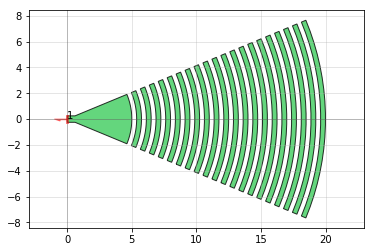

In [3]:
D = Device('PG')

# D << pg.arc(radius=10,start_angle=0,theta=90,width=2)
D << mn.arc_grating()
qp(D)
# D.write_gds('arc_graitng.gds')

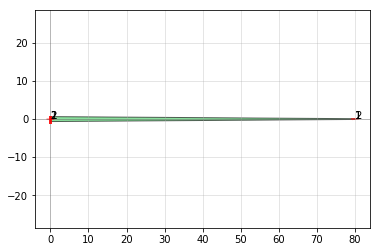

In [23]:
D = Device('mode_converter')

length = 80
CT1 = D << pg.connector(width=0.2).movex(length)
CT2 = D << pg.connector(width=1.3)
TP = D << pr.route_basic(port1=CT1.ports[1],port2=CT2.ports[2])

qp(D)
# D.write_gds('inverse_taper.gds')

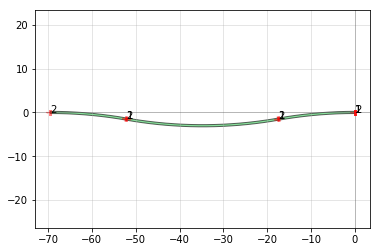

In [47]:
D = Device('bus')

wg1 = D << pg.connector(width=0.5)
arc1 = D << pg.turn(wg1.ports[2],angle=10,radius=100,angle_resolution=1)
arc2 = D << pg.turn(arc1.ports[2],angle=-20,radius=100,angle_resolution=1)
arc3 = D << pg.turn(arc2.ports[2],angle=10,radius=100,angle_resolution=1)
# wg2 = D << waveguide(0.5,20)
qp(D)
# D.write_gds('view.gds')

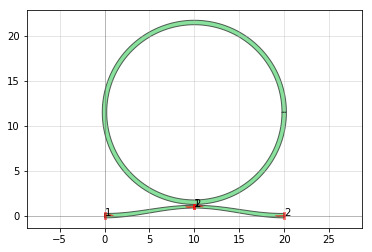

'view.gds'

In [34]:
D = Device('bus')

# gt1 = D << mn.arc_grating().rotate(180)
a1 = pg.connector((0,0),0.5)
a2 = pg.connector((10,1),0.3)
a3 = pg.connector((20,0),0.5)

w1 = D << pr.route_basic(port1=a1.ports[2],port2=a2.ports[1])
w2 = D << pr.route_basic(port1=a2.ports[2],port2=a3.ports[1])
rg = D << pg.ring(radius=10, width=0.5).move((10,12))

rg.ymin = w1.ymax + 0.1
qp(D)
D.write_gds('view.gds')

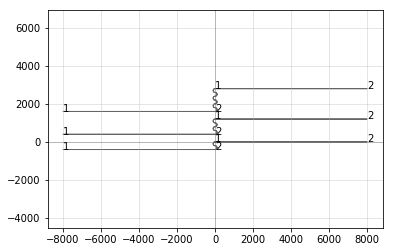

'simple_s.gds'

In [2]:
D = Device('simple')

l = 8e3
bend = 100
w = 1
wg1 = D << mn.waveguide(w,l)
wg2 = D << mn.waveguide(w,l).move((-l,-4*bend))

S = Device('s_shape') 
wg0 = S << pg.connector(width=w)
arc1 = S << pg.turn(wg0.ports[2],angle=180,radius=bend,angle_resolution=1)
arc2 = S << pg.turn(arc1.ports[2],angle=-180,radius=bend,angle_resolution=1)
D << S

y_shift = 6*2*bend
wg1 = D << mn.waveguide(w,l).move((0,y_shift))
wg2 = D << mn.waveguide(w,l).move((-l,y_shift-8*bend))

S1 = pg.copy(S)
D << S1.movey(y_shift)
S2 = pg.copy(S)
D << S2.movey(y_shift-4*bend)


y_shift = 14*2*bend
wg1 = D << mn.waveguide(w,l).move((0,y_shift))
wg2 = D << mn.waveguide(w,l).move((-l,y_shift-12*bend))

S1 = pg.copy(S)
D << S1.movey(y_shift)
S2 = pg.copy(S)
D << S2.movey(y_shift-4*bend)
S2 = pg.copy(S)
D << S2.movey(y_shift-8*bend)

# y_shift = 16*2*bend
# wg1 = D << mn.waveguide(w,l).move((0,y_shift))
# wg2 = D << mn.waveguide(w,l).move((-l,y_shift-16*bend))

# S1 = pg.copy(S)
# D << S1.movey(y_shift)
# S2 = pg.copy(S)
# D << S2.movey(y_shift-4*bend)
# S3 = pg.copy(S)
# D << S2.movey(y_shift-8*bend)
# S4 = pg.copy(S)
# D << S2.movey(y_shift-12*bend)

qp(D)
D.write_gds('simple_s.gds')


In [6]:
def s_shape(l):
    D = Device()
    wg = D << mn.waveguide(width=w,length=l).movex(-l/2).rotate(90)
    b1 = D << pg.turn(wg.ports[1],angle=-90,radius=bend,angle_resolution=2)
    b2 = D << pg.turn(wg.ports[2],angle=-90,radius=bend,angle_resolution=2)
#     D << mn.waveguide()
    return D

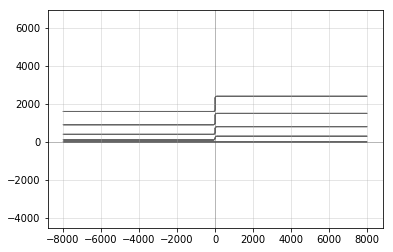

'simple.gds'

In [7]:
D = Device('simple')

l = 8e3
wg0 = D << mn.waveguide(w,2*l).movex(-l)

bend = 100
w = 1

step = 200
ys = 0
for i in range(4):
    ys += (i+1)*step
    S = Device('S_shape')
    h=i*step
    S << pg.copy(s_shape(h))
    S << mn.waveguide(w,l-bend).move((bend,h/2+bend))
    S << mn.waveguide(w,l-bend).move((-l,-h/2-bend))
    D << S.movey(ys)

D.flatten()
qp(D)
D.write_gds('simple.gds')


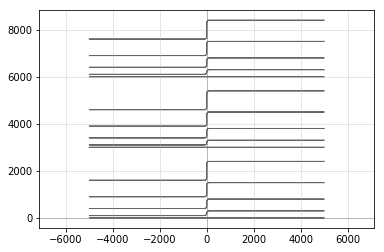

'simple_set.gds'

In [12]:
D = Device('simple')

l = 5e3

bend = 100
w = 1

wg0 = D << mn.waveguide(w,2*l).movex(-l)


step = 200
ys = 0
for i in range(4):
    ys += (i+1)*step
    S = Device('S_shape')
    h=i*step
    S << pg.copy(s_shape(h))
    S << mn.waveguide(w,l-bend).move((bend,h/2+bend))
    S << mn.waveguide(w,l-bend).move((-l,-h/2-bend))
    D << S.movey(ys)

D.flatten()

D_set = Device('final')

D_set << pg.deepcopy(D)
D_set << pg.deepcopy(D).movey(3e3)
D_set << pg.deepcopy(D).movey(6e3)

qp(D_set)
D_set.write_gds('simple_set.gds')
